In [82]:
# importing the Modules, Pakages and Libraries Needed for Loan Prediction
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression 

In [83]:
# Importing Training Dataset
path_train = r"Dataset\train.csv"
train = pd.read_csv(path_train)

train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [84]:
# Importing Testing Dataset
path_test = r"Dataset\test.csv"
test = pd.read_csv(path_test)

test.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [157]:
# As Loan_Status of Testing dataset in another dataset is in Another dataset 
# So, importing Sample Dataset which contain Loan_Status Column
sample_path = r"Dataset\sample.csv"
sample = pd.read_csv(sample_path)

sample.tail()

,Loan_ID,Loan_Status
362,LP002971,Y
363,LP002975,Y
364,LP002980,Y
365,LP002986,Y
366,LP002989,Y


In [86]:
# Making Copy of dataset(s) for Safety purposes
test_original = test.copy()
train_original = train.copy() 
sample_original = sample.copy()

In [87]:
# Checking The DataTypes of training Dataset each column
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [88]:
# Checking the Data Type of Testing dataSet each column
test.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

In [89]:
# Checking the Data Type of Sample dataSet each column
sample.dtypes

Loan_ID        object
Loan_Status    object
dtype: object

In [158]:
# Checking The Shape of all three Datasets
print("Shape of Training Dataset : ",train.shape)
print("Shape of Testing Dataset : ",test.shape)
print("Shape of Sample Dataset : ",sample.shape)

Shape of Training Dataset :  (614, 12)
Shape of Testing Dataset :  (367, 11)
Shape of Sample Dataset :  (367, 2)


In [91]:
# Checking For Null or Nan Values in Testing Dataset for removing them 
total = train.count().sort_values(ascending=True)
missing = train.isnull().sum().sort_values(ascending=True)

missing_data = pd.concat([total,missing],axis = 1 , keys = ["Total","Missing Values"])
missing_data.head(20)

,Total,Missing Values
Credit_History,564,50
Self_Employed,582,32
LoanAmount,592,22
Dependents,599,15
Loan_Amount_Term,600,14
Gender,601,13
Married,611,3
Loan_ID,614,0
Education,614,0
ApplicantIncome,614,0


In [92]:
# Replaceing all the null Values in the Training Dataset with their 'mode'
train['Gender'] = train['Gender'].fillna(train['Gender'].dropna().mode().values[0])
train['Married'] = train['Married'].fillna(train['Married'].dropna().mode().values[0])
train['Loan_Amount_Term'] = train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].dropna().mode().values[0])
train['Dependents'] = train['Dependents'].fillna(train['Dependents'].dropna().mode().values[0])
train['LoanAmount'] = train['LoanAmount'].fillna(train['LoanAmount'].dropna().mode().values[0])
train['Self_Employed'] = train['Self_Employed'].fillna(train['Self_Employed'].dropna().mode().values[0])
train['Credit_History'] = train['Credit_History'].fillna(train['Credit_History'].dropna().mode().values[0])


In [93]:
# Again Checking for Null or NaN Values for Confirming whether they are dealt with or not
total = train.count().sort_values(ascending=True)
missing = train.isnull().sum().sort_values(ascending=True)

missing_data = pd.concat([total,missing],axis = 1 , keys = ["Total","Missing Values"])
missing_data.head(20)

,Total,Missing Values
Loan_ID,614,0
Gender,614,0
Married,614,0
Dependents,614,0
Education,614,0
Self_Employed,614,0
ApplicantIncome,614,0
CoapplicantIncome,614,0
LoanAmount,614,0
Loan_Amount_Term,614,0


# Data Visualization(Understanding the data)

<AxesSubplot:xlabel='count', ylabel='Gender'>

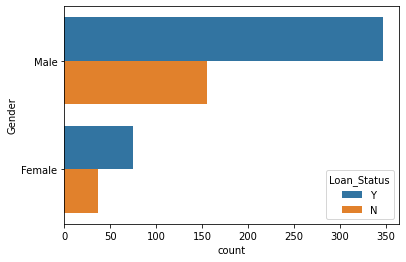

In [94]:
# Now, Visualizing of the Different Attributes of Dataset for Understanding the Data
sns.countplot(y = 'Gender' , hue = 'Loan_Status' , data = train)

From Above Graph, We Can See That no. Of Males is Higher than Females whose Loans are Approved

<AxesSubplot:xlabel='count', ylabel='Married'>

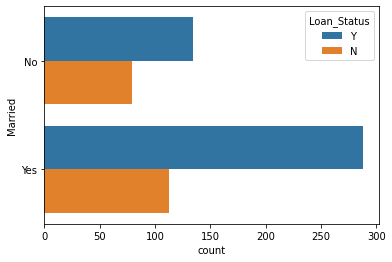

In [95]:
sns.countplot(y = 'Married' , hue = 'Loan_Status' , data = train)


From Above Graph, We Can See That no. Of whose Loans are Approved are higher for the Person which is Married

<AxesSubplot:xlabel='count', ylabel='Dependents'>

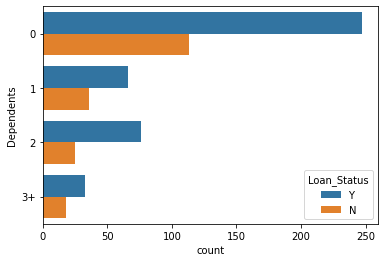

In [96]:
sns.countplot(y = 'Dependents' , hue = 'Loan_Status' , data = train)


From Above Graph, We Can See That no. Of Loans are Approved in case of No Dependents

<AxesSubplot:xlabel='count', ylabel='Education'>

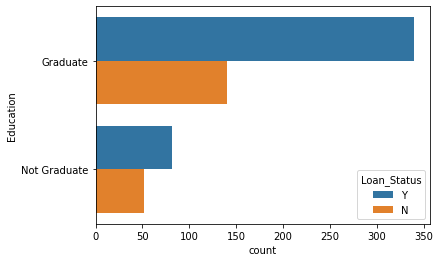

In [97]:
sns.countplot(y = 'Education' , hue = 'Loan_Status' , data = train)


From Above Graph, We Can See That no. Of Loans are Approved are higher in Case of Graduated Person

<AxesSubplot:xlabel='count', ylabel='Self_Employed'>

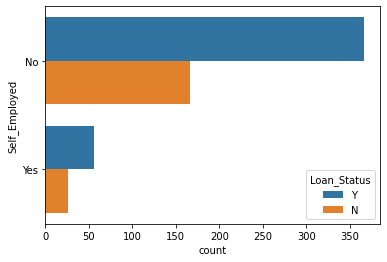

In [98]:
sns.countplot(y = 'Self_Employed' , hue = 'Loan_Status' , data = train)


From Above Graph, We Can See That no. Of Loans Approved are High in case of No Self Employment

C:\Users\WebbWayne1\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

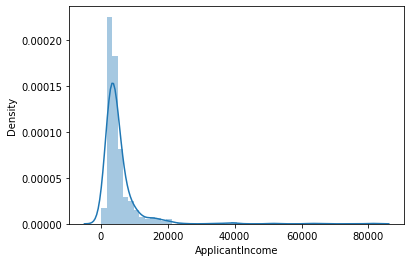

In [99]:
sns.distplot(train['ApplicantIncome'])


From Above graph we can See that maximum no. of person has their income in range of 0 - 10000 

C:\Users\WebbWayne1\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

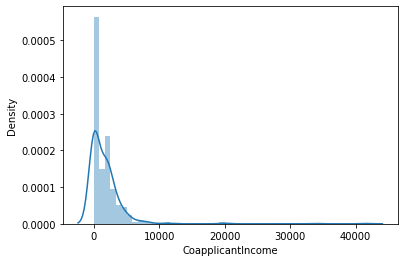

In [100]:
sns.distplot(train['CoapplicantIncome'])


From Above Graph we Can See that most of the CoApplicant Income Is 0

C:\Users\WebbWayne1\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

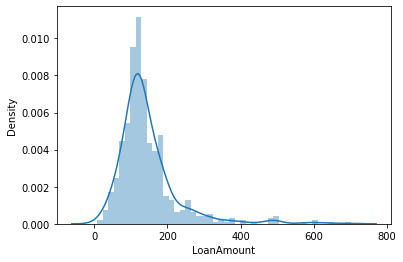

In [101]:
sns.distplot(train['LoanAmount'])


From Above graph we can see that Most People Need Loan Amount Around 130 - 160 

<AxesSubplot:xlabel='count', ylabel='Loan_Amount_Term'>

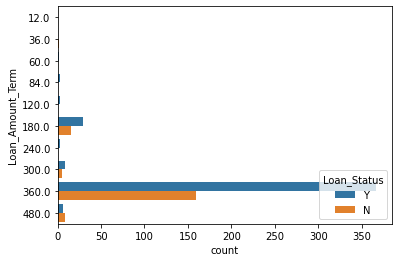

In [102]:
sns.countplot(y = 'Loan_Amount_Term' , hue = 'Loan_Status' , data = train)


From Above Graph, We Can See That no. Of Loans Approved are higher for the Term of 360

<AxesSubplot:xlabel='count', ylabel='Credit_History'>

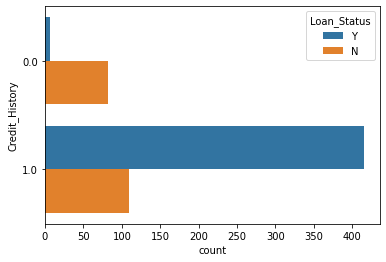

In [103]:
sns.countplot(y = 'Credit_History' , hue = 'Loan_Status' , data = train)


From Above Graph, We Can See That no. Of Loans Approved are higher for Credit History of 1

<AxesSubplot:xlabel='count', ylabel='Property_Area'>

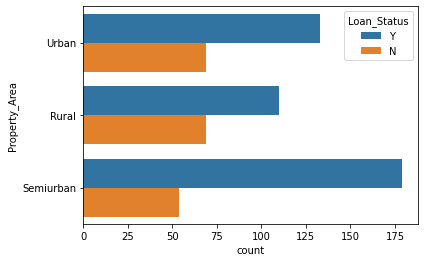

In [104]:
sns.countplot(y = 'Property_Area' , hue = 'Loan_Status' , data = train)


From Above Graph, We Can See That no. Of Loans Approved are high for person living in Semiurban Area

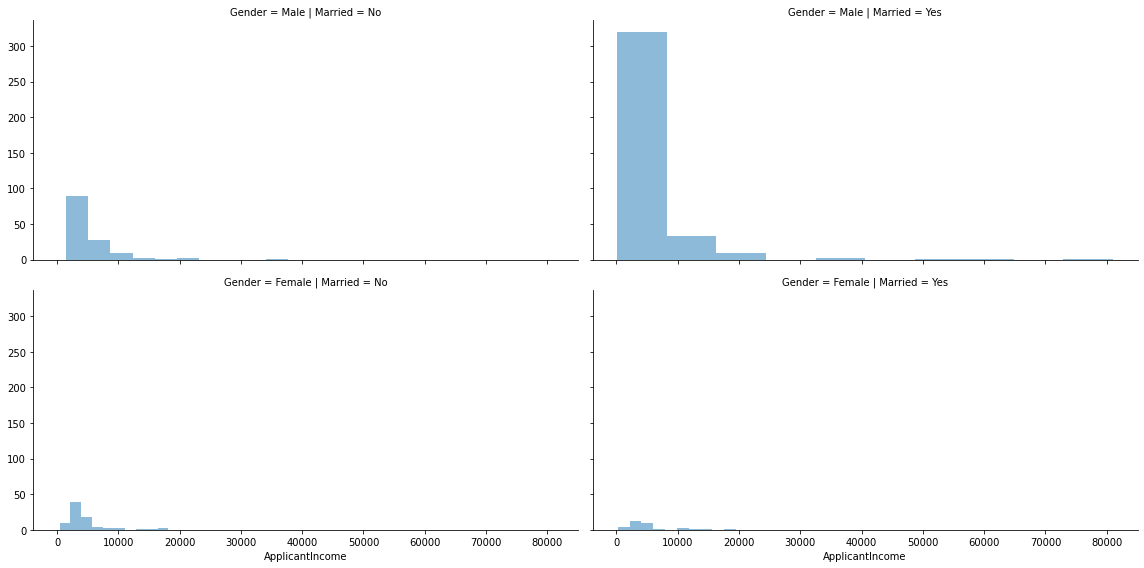

In [105]:
grid = sns.FacetGrid(train , col = 'Married' , row='Gender', height=4, aspect=2)
grid.map(plt.hist,'ApplicantIncome',alpha = 0.5)



From Above Graph, We Can See That no. Of Loan Application is Highest for Married Males whose Income ranges from 0-10000

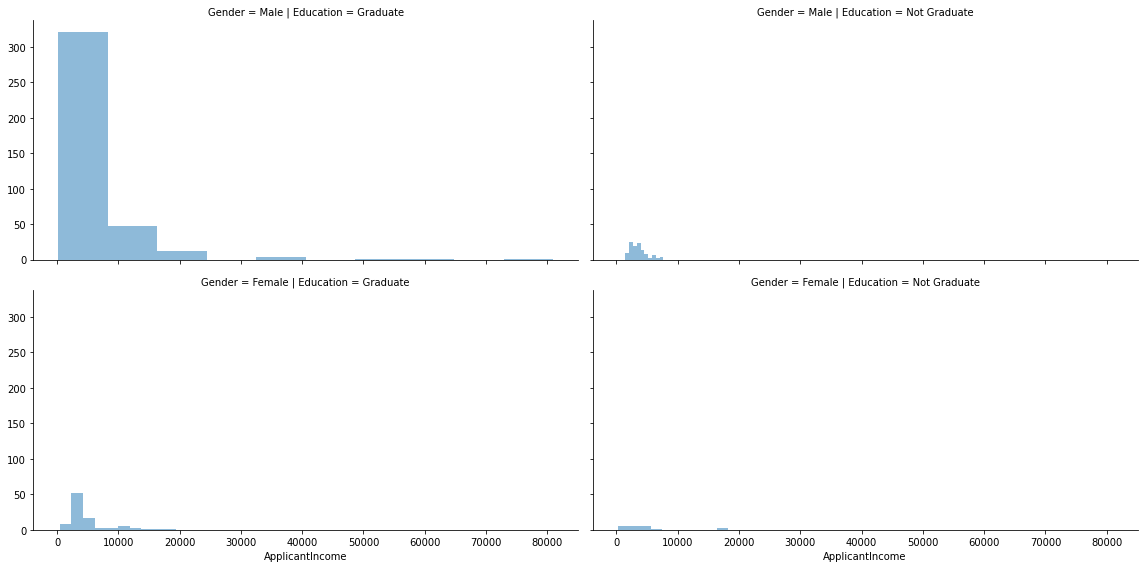

In [106]:
grid = sns.FacetGrid(train , col = 'Education' , row='Gender', height=4, aspect=2)
grid.map(plt.hist,'ApplicantIncome',alpha = 0.5)

From Above Graph, We Can See That no. Of Loan Application is Highest for Graduated Males whose Income ranges from 0-10000

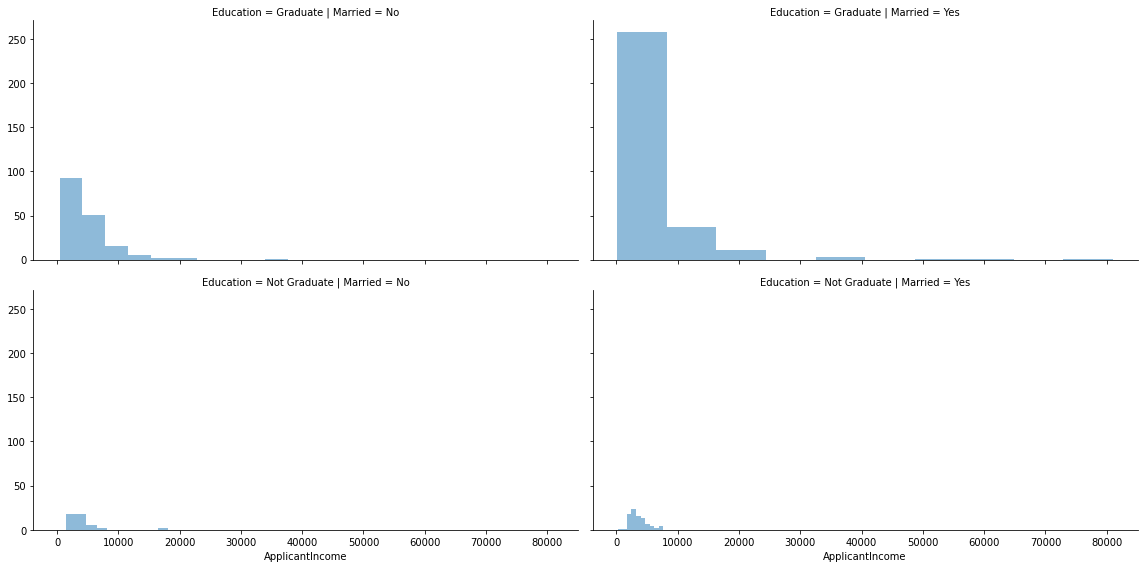

In [107]:
grid = sns.FacetGrid(train , col = 'Married' , row='Education', height=4, aspect=2)
grid.map(plt.hist,'ApplicantIncome',alpha = 0.5)



From Above Graph, We Can See That no. Of Loan Application is Highest for Graduated Married individuals  whose Income ranges from 0-10000

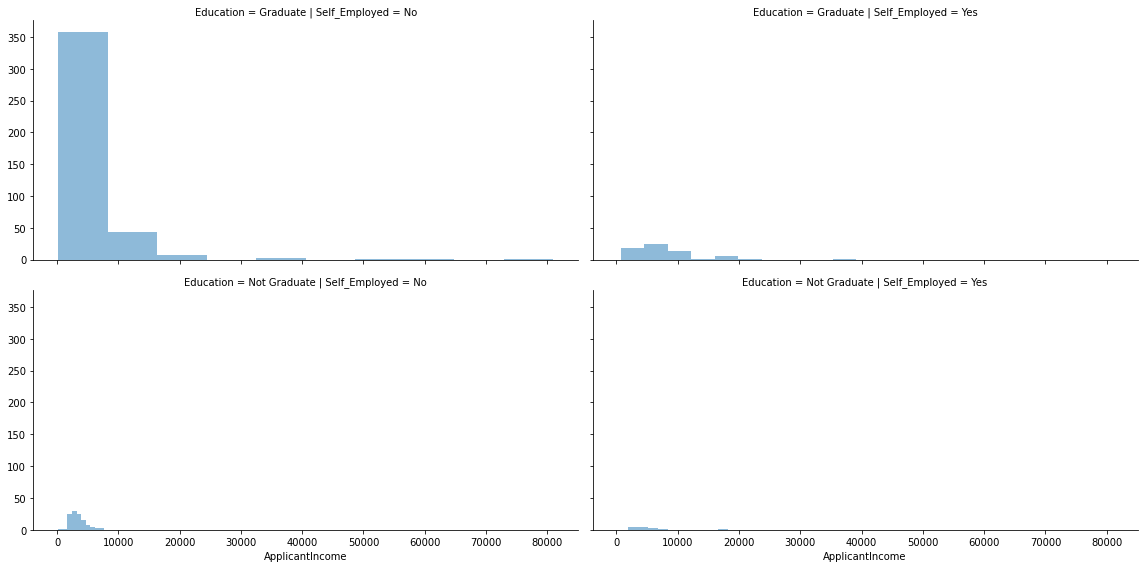

In [108]:
grid = sns.FacetGrid(train , col = 'Self_Employed' , row='Education', height=4, aspect=2)
grid.map(plt.hist,'ApplicantIncome',alpha = 0.5)



From Above Graph, We Can See That no. Of Loan Application is Highest for Not Self-Employed Graduated whose Income ranges from 0-10000

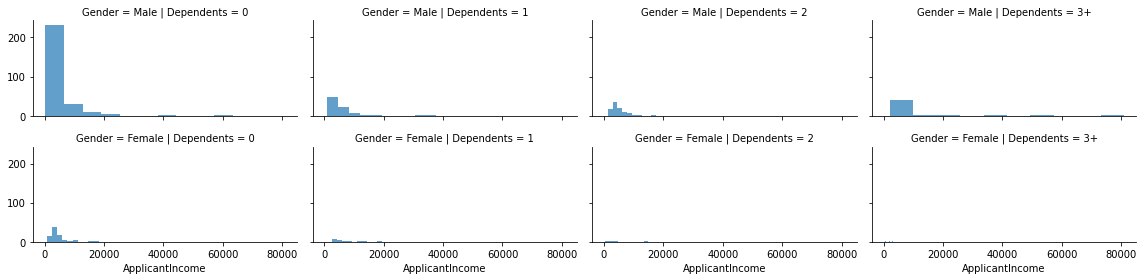

In [109]:
grid = sns.FacetGrid(train, row="Gender",col = "Dependents" , height = 2 , aspect = 2)
grid.map(plt.hist , "ApplicantIncome" , alpha = 0.7)

From Above Graph, We Can See That no. Of Loan Application is Highest for Males with No Dependents whose Income ranges from 0-10000

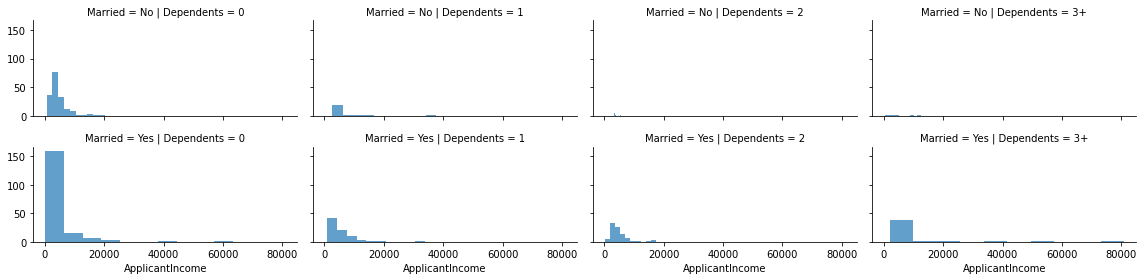

In [110]:
grid = sns.FacetGrid(train , row= "Married" , col = "Dependents" , height = 2 , aspect = 2)
grid.map(plt.hist , "ApplicantIncome" , alpha = 0.7)

From Above Graph, We Can See That no. Of Loan Application is Highest for Merried Individuals With no Dependents whose Income ranges from 0-10000

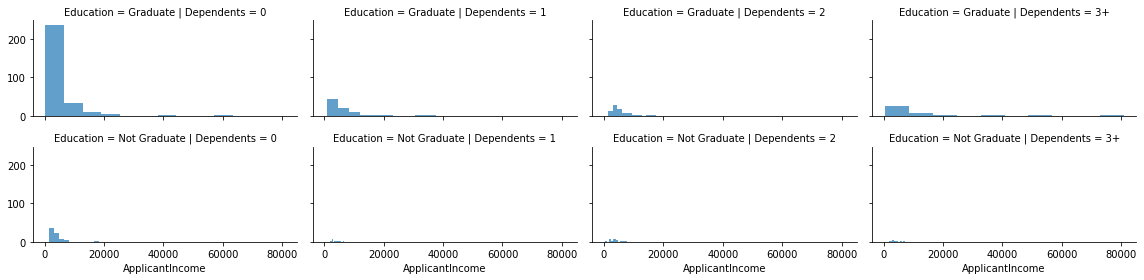

In [111]:
grid = sns.FacetGrid(train , row = "Education" , col = "Dependents" , height=2, aspect = 2)
grid.map(plt.hist , "ApplicantIncome" , alpha = 0.7)

From Above Graph, We Can See That no. Of Loan Application is Highest for Graduates with no Dependents whose Income ranges from 0-10000

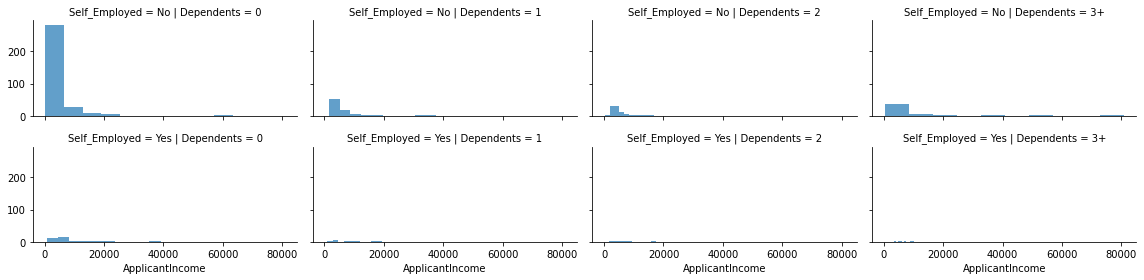

In [112]:
grid = sns.FacetGrid(train , row = "Self_Employed" , col = "Dependents" , height = 2 , aspect =2)
grid.map(plt.hist,"ApplicantIncome" , alpha = 0.7)

From Above Graph, We Can See That no. Of Loan Application is Highest for Individuals who are Not Self-Employed with no Dependents whose Income ranges from 0-10000

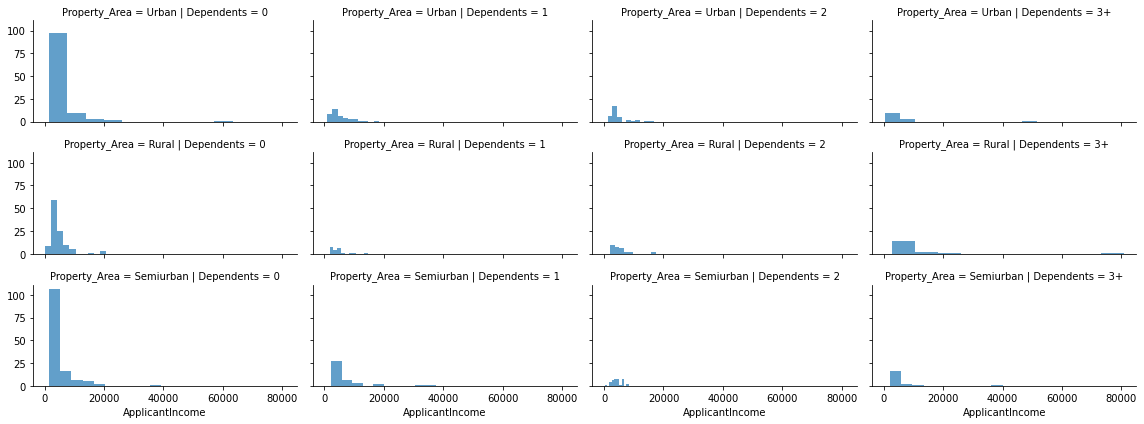

In [113]:
grid = sns.FacetGrid(train , row = "Property_Area" , col = "Dependents" , height = 2 , aspect =2)
grid.map(plt.hist,"ApplicantIncome" , alpha = 0.7)

From Above Graph, We Can See That no. Of Loan Application is equal in case of Both Individuals whose Property are in Urban and Semiurban are and also has no Dependents whose Income ranges from 0-10000

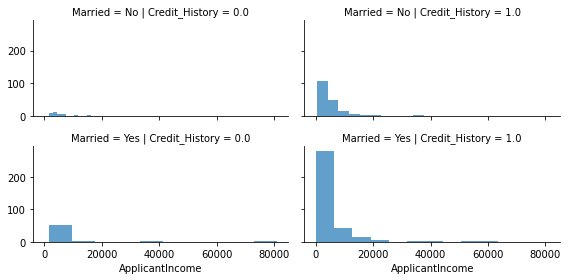

In [114]:
grid = sns.FacetGrid(train , row = "Married" , col = "Credit_History" , height = 2 , aspect =2)
grid.map(plt.hist,"ApplicantIncome" , alpha = 0.7)

"From Above Graph, We Can See That no. Of Loan Application is Highest for Married individuals with Good(1) Credit History whose Income ranges from 0-10000"

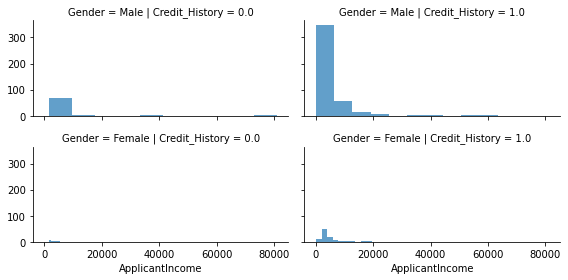

In [115]:
grid = sns.FacetGrid(train , row = "Gender" , col = "Credit_History" , height = 2 , aspect =2)
grid.map(plt.hist,"ApplicantIncome" , alpha = 0.7)

From Above Graph, We Can See That no. Of Loan Application is Highest for Male individuals with Good(1) Credit History whose Income ranges from 0-10000

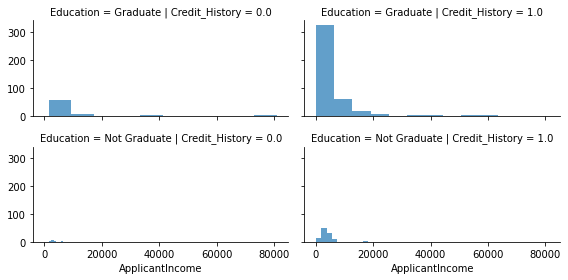

In [116]:
grid = sns.FacetGrid(train , row = "Education" , col = "Credit_History" , height = 2 , aspect =2)
grid.map(plt.hist,"ApplicantIncome" , alpha = 0.7)

From Above Graph, We Can See That no. Of Loan Application is Highest for Graduates with Good(1) Credit History whose Income ranges from 0-10000

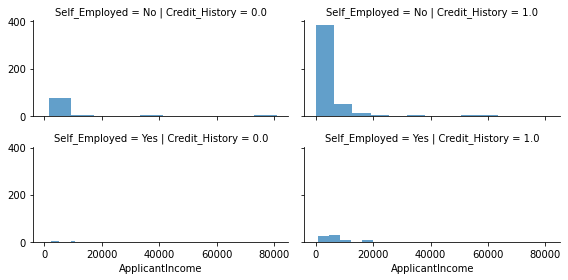

In [117]:
grid = sns.FacetGrid(train , row = "Self_Employed" , col = "Credit_History" , height = 2 , aspect =2)
grid.map(plt.hist,"ApplicantIncome" , alpha = 0.7)

From Above Graph, We Can See That no. Of Loan Application is Highest for individual those who are not Self-Employed and with Good(1) Credit History whose Income ranges from 0-10000

# Data Preperation and Cleaning (Continue....)

In [118]:
# Checking For the Columns Names for Comfirming that We have Covered Every Attribute
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [119]:
# Defining the Token 
token = {"Male": 1, "Female": 2,
         "Yes": 1, "No" : 2, 
         "Graduate": 1, "Not Graduate": 2, 
         "Urban": 3, "Semiurban": 2, "Rural": 1,
         "3+": 3, "2": 2, "1":1, "0":0,
         "Y": 1, "N": 0}

In [163]:
# Tokenizing the Data
train = train.applymap(lambda s: token.get(s) if s in token else s)

test = test.applymap(lambda s: token.get(s) if s in token else s)

sample = sample.applymap(lambda s: token.get(s) if s in token else s)

In [121]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,2,0,1,2,5849,0.0,120.0,360.0,1.0,3,1
1,LP001003,1,1,1,1,2,4583,1508.0,128.0,360.0,1.0,1,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,3,1
3,LP001006,1,1,0,2,2,2583,2358.0,120.0,360.0,1.0,3,1
4,LP001008,1,2,0,1,2,6000,0.0,141.0,360.0,1.0,3,1


In [122]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,1.0,1,0.0,1,2.0,5720,0,110.0,360.0,1.0,3
1,LP001022,1.0,1,1.0,1,2.0,3076,1500,126.0,360.0,1.0,3
2,LP001031,1.0,1,2.0,1,2.0,5000,1800,208.0,360.0,1.0,3
3,LP001035,1.0,1,2.0,1,2.0,2340,2546,100.0,360.0,NaN,3
4,LP001051,1.0,2,0.0,2,2.0,3276,0,78.0,360.0,1.0,3


In [123]:
# Droping the unnecessary Columns 
train.drop("Loan_ID", axis=1 , inplace = True)

In [124]:
train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,2,0,1,2,5849,0.0,120.0,360.0,1.0,3,1
1,1,1,1,1,2,4583,1508.0,128.0,360.0,1.0,1,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,3,1
3,1,1,0,2,2,2583,2358.0,120.0,360.0,1.0,3,1
4,1,2,0,1,2,6000,0.0,141.0,360.0,1.0,3,1


In [125]:
# Checking Info To Confirm that every data in data set converted into int and float and succesfully tokenize 
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Dependents         614 non-null    int64  
 3   Education          614 non-null    int64  
 4   Self_Employed      614 non-null    int64  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int64  
 11  Loan_Status        614 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 57.7 KB


In [126]:
# Checkin the Correlation Matrix(Dependancy) of the Data attributes 
crr_ = train.corr()
crr_

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.364569,-0.172914,-0.045364,-0.000525,-0.058809,-0.082912,-0.106404,0.074030,-0.009170,0.025752,-0.017987
Married,0.364569,1.000000,-0.334216,-0.012304,0.004489,-0.051708,-0.075948,-0.146212,0.100912,-0.010938,-0.004257,-0.091478
Dependents,-0.172914,-0.334216,1.000000,0.055752,-0.056798,0.118202,0.030430,0.163017,-0.103864,-0.040160,-0.000244,0.010118
Education,-0.045364,-0.012304,0.055752,1.000000,0.010383,-0.140760,-0.062290,-0.169436,-0.073928,-0.073658,-0.065243,-0.085884
Self_Employed,-0.000525,0.004489,-0.056798,0.010383,1.000000,-0.127180,0.016100,-0.114971,0.033739,0.001550,0.030860,0.003700
ApplicantIncome,-0.058809,-0.051708,0.118202,-0.140760,-0.127180,1.000000,-0.116605,0.564698,-0.046531,-0.018615,-0.009500,-0.004710
CoapplicantIncome,-0.082912,-0.075948,0.030430,-0.062290,0.016100,-0.116605,1.000000,0.189723,-0.059383,0.011134,0.010522,-0.059187
LoanAmount,-0.106404,-0.146212,0.163017,-0.169436,-0.114971,0.564698,0.189723,1.000000,0.037152,-0.000250,-0.047414,-0.031808
Loan_Amount_Term,0.074030,0.100912,-0.103864,-0.073928,0.033739,-0.046531,-0.059383,0.037152,1.000000,-0.004705,-0.076120,-0.022549
Credit_History,-0.009170,-0.010938,-0.040160,-0.073658,0.001550,-0.018615,0.011134,-0.000250,-0.004705,1.000000,0.001963,0.540556


<AxesSubplot:>

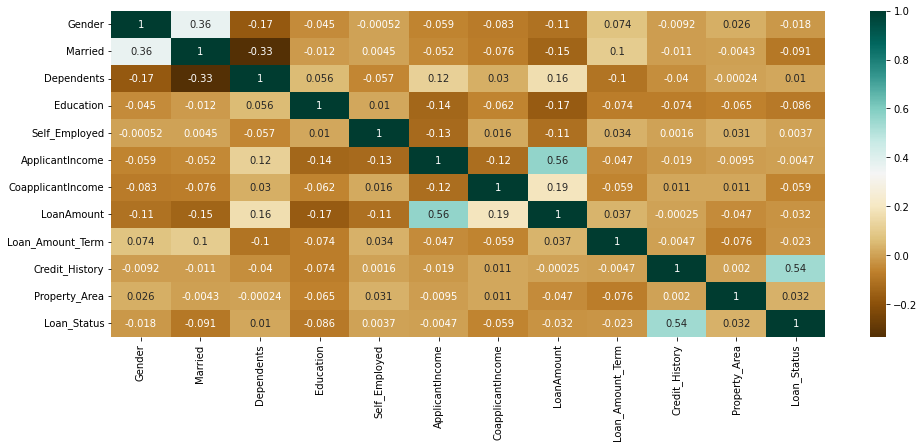

In [127]:
# Visualizing Heatmap foe better Understanding 
plt.figure(figsize=(16, 6))
sns.heatmap(crr_ ,annot = True, cmap ="BrBG")

In [128]:
# Splitting the Training Dataset in Attributes and Value to Be Predicted
y = train["Loan_Status"]
X = train.drop("Loan_Status",axis=1)


# Fitting Data In Model And Prediction of Data

In [129]:
# Initializing Model
log_reg = LogisticRegression()

# -------Applying the Algorithm in Same Dataset by Splitting the Dataset in Testing and training Dataset--------

In [171]:
# Dividing the Training Dataset into Testing and training Dataset 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [172]:
# Fitting the Dataset into Logistic Regression Model
log_reg.fit(X_train,y_train)

C:\Users\WebbWayne1\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [173]:
# Predicting the Value 
y_pred = log_reg.predict(X_test)

# Checking the Accuracy Using F1_score
Accuracy = f1_score(y_test,y_pred)
Accuracy

0.8949152542372881

# ----Now Checking the Accuracy and Prediction Using Different Dataset (Testing Datset)-----

In [135]:
# Removing Unnecessary Attributes 
test.drop("Loan_ID",axis = 1, inplace = True)

In [136]:
test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1.0,1,0.0,1,2.0,5720,0,110.0,360.0,1.0,3
1,1.0,1,1.0,1,2.0,3076,1500,126.0,360.0,1.0,3
2,1.0,1,2.0,1,2.0,5000,1800,208.0,360.0,1.0,3
3,1.0,1,2.0,1,2.0,2340,2546,100.0,360.0,NaN,3
4,1.0,2,0.0,2,2.0,3276,0,78.0,360.0,1.0,3


In [159]:
# Droping Unnecessary Attributes
sample.drop("Loan_ID",axis = 1, inplace = True)
sample.head()

,Loan_Status
0,Y
1,Y
2,Y
3,Y
4,Y


# Preprocessing the Testing Dataset

In [145]:
# Checking For Null or NaN values
total = test.count().sort_values(ascending=True)
missing = test.isnull().sum().sort_values(ascending=True)

missing_data = pd.concat([total,missing],axis = 1 , keys = ["Total","Missing Values"])
missing_data.head(20)

,Total,Missing Values
Credit_History,338,29
Self_Employed,344,23
Gender,356,11
Dependents,357,10
Loan_Amount_Term,361,6
LoanAmount,362,5
Married,367,0
Education,367,0
ApplicantIncome,367,0
CoapplicantIncome,367,0


In [146]:
# Replacing the NaN and Null Values in Testing Dataset

test['Gender'] = test['Gender'].fillna(test['Gender'].dropna().mode().values[0])
test['Married'] = test['Married'].fillna(test['Married'].dropna().mode().values[0])
test['Loan_Amount_Term'] = test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].dropna().mode().values[0])
test['Dependents'] = test['Dependents'].fillna(test['Dependents'].dropna().mode().values[0])
test['LoanAmount'] = test['LoanAmount'].fillna(test['LoanAmount'].dropna().mode().values[0])
test['Self_Employed'] = test['Self_Employed'].fillna(test['Self_Employed'].dropna().mode().values[0])
test['Credit_History'] = test['Credit_History'].fillna(test['Credit_History'].dropna().mode().values[0])


In [147]:
# Again Checking For Null and NaN Values for Conformation that all the Values ahave been dealt with
total = test.count().sort_values(ascending=True)
missing = test.isnull().sum().sort_values(ascending=True)

missing_data = pd.concat([total,missing],axis = 1 , keys = ["Total","Missing Values"])
missing_data.head(20)

,Total,Missing Values
Gender,367,0
Married,367,0
Dependents,367,0
Education,367,0
Self_Employed,367,0
ApplicantIncome,367,0
CoapplicantIncome,367,0
LoanAmount,367,0
Loan_Amount_Term,367,0
Credit_History,367,0


In [164]:
# Assigning dataset to variables for Data fitting anf Prediction
y_test = sample
X_test = test

# Prediction Using Testing Dataset

In [165]:
# Prediction Using Logistic Regression Modal
pred = log_reg.predict(X_test)

# Checking Accuracy Using F1 Score
accuracy = f1_score(y_test,pred)
accuracy



0.822950819672131

In [174]:
print("Accuracy When Splitting the Training Datset into Training and Testing Dataset : ",Accuracy*100,"%")
print("Accuracy When Using the Provided Testing Dataset : ",accuracy*100,"%")

Accuracy When Splitting the Training Datset into Training and Testing Dataset :  89.49152542372882 %
Accuracy When Using the Provided Testing Dataset :  82.29508196721311 %
